<a id="top"></a>
<h1 style="font-family:verdana;"> <center>🏆 FIFA : Most Optimized Transfer Window 🏆</center> </h1>
<p><center style="color:#159364; font-family:cursive;">Let's start with a little intro</center></p>

***
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
You are giving Santa Clara a try to challenge yourself a bit after you won everything you could have possibly won in your Big 6 career mode. However, you don't want it to be too big of a challenge and decide to give yourself a small financial takeover boost of 100M euros. With this amount of money, which 11 players are you bringing in to help Santa Clara dominate Europe?
</div>

![images.jpg](https://images.livemint.com/img/2020/06/19/600x338/Fifa_1592566574619_1592566698613.png)

# **Table of Contents**

<a id = 'max 10'></a>

* [Importing Libraries and Exploring Data](#1)


* [Data Manipualtion and Cleaning](#2)
  * Deleted Useless Columns
  * Formed a new column of BMI using Weights and Heights column
  * Countered Null values using Get Dummies for Player positions
  * For columns like Dribbling, Defendind,Pace etc used Median value


* [Data Analysis](#3)
   * Relationship of Overall Rating and Value in Euros using Scatter Plot
   * Relationship of Potential Rating and Wage in Euros using Scatter Plot
   * Count of Preferred Foot and International Reputation using Count Plot
   * Distribution of Age and BMI using Histogram
   * Relationship of BMI vs Pace and Weight vs Pace using Reg Plot
   
   
   
* [Top 20 Analysis](#4)
   * Which Country has Max players in Top 20?
   * Which Club has Max players in Top 20?
   * Which type of player comes most in Top 20?
   * Which age belongs to max players in Top 20?
   
   
   
* [The Biggest Rivalry - Messi and Ronaldo](#5)
   * Comparison of different attributes using **Radar Plot**
   
   
* [Other Top Class Comparisons](#6)
   * Comparison of Kevin De Bryne and Luka Modric using Radar Plot
   * Comparison of Van Dijk and Sergio Ramos using Radar Plot
   * Comparison of Harry Kane and Sergio Aguero using Radar Plot
  

# **1. Importing Libraries & Data Exploration** <a class="anchor" id="1"></a>

In [48]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi #Used in Radar Plots
import seaborn as sns
sns.set_style(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [49]:
fifa_21 = pd.read_csv('data/players_21.csv')

# **2. Data Manipulation & Cleaning** <a class="anchor" id="2"></a>

Data manipulation and cleaning snippet of codes is borrowed from Pawan Jain's [amazing Kaggle notebook](https://www.kaggle.com/dude431/fifa-21-eda-cleaning).

In [50]:
useless_column = ['dob','sofifa_id','player_url','long_name','body_type','real_face','nation_position','loaned_from','nation_jersey_number']

fifa_21 = fifa_21.drop(useless_column, axis = 1)

fifa_21['BMI'] = fifa_21 ['weight_kg'] / (fifa_21['height_cm'] / 100) ** 2

new_player_position = fifa_21['player_positions'].str.get_dummies(sep=',').add_prefix('Position')

fifa_21 =  pd.concat([fifa_21,new_player_position],axis = 1)
# fifa_21 =  fifa_21.drop('player_positions',axis=1)

columns = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

for col in columns:
  fifa_21[col] = fifa_21[col].str.split('+',n=1,expand = True)[0]
        

fifa_21[columns] = fifa_21[columns].fillna(0)
fifa_21[columns] = fifa_21[columns].astype(int)

columns = ['dribbling','defending','physic','passing','shooting','pace']

fifa_21[columns].isnull().sum()

for col in columns:
  fifa_21[col] = fifa_21[col].fillna(fifa_21[col].median())

fifa_21 = fifa_21.fillna(0)

fifa_21 = fifa_21.loc[fifa_21["value_eur"] > 0]

fifa_21["value_million_eur"] = pd.to_numeric(fifa_21['value_eur'], errors='coerce') / 1000000

fifa_21.isnull().sum() #Verifying it Should be all zero

short_name           0
age                  0
height_cm            0
weight_kg            0
nationality          0
                    ..
PositionRM           0
PositionRW           0
PositionRWB          0
PositionST           0
value_million_eur    0
Length: 128, dtype: int64

# **3. Data Exploration** <a class="anchor" id="3"></a>

First of all, we define the functions to visualize the lineup given a formation. The original code is taken from Stefano Leone's [Kaggle notebook](https://www.kaggle.com/stefanoleone992/fifa-21-career-mode-players-lineup-visualization).

In [51]:
# original code taken from https://towardsdatascience.com/advanced-sports-visualization-with-pandas-matplotlib-and-seaborn-9c16df80a81b

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, ConnectionPatch, Arc
from matplotlib.font_manager import FontProperties

# 4-3-3
squad_433 = [
    "GK",
    "LB|LWB|LDM",
    "LCB|CB",
    "RCB|CB",
    "RB|RWB|RDM",
    "CDM|CM|CAM",
    "CDM|CM|CAM",
    "CDM|CM|CAM",
    "LF|LW|LM",
    "CF|ST",
    "RF|RW|RM",
]
# 3-5-2
squad_352 = [
    "GK",
    "LB|LCB|CB",
    "CB",
    "RB|RCB|CB",
    "LW|LWB|LM|LCM",
    "CDM|CM",
    "CDM|CM",
    "CM|CAM|CF",
    "RW|RWB|RM|RCM",
    "LC|LW|CF|ST",
    "RC|RW|CF|ST",
]


def get_best_lineup(df_name, squad_lineup, club_name="", measurement="overall"):
    df_copy = df_name.copy()
    if club_name != "":
        df_copy = df_copy[df_copy["club_name"] == club_name]
    squad_default_dict = dict()
    for i in squad_lineup:
        squad_default_dict[
            df_copy.loc[
                [
                    df_copy[df_copy["player_positions"].str.contains(i)][
                        measurement
                    ].idxmax()
                ]
            ]["short_name"].to_string(index=False)
        ] = [
            df_copy.loc[
                [
                    df_copy[df_copy["player_positions"].str.contains(i)][
                        measurement
                    ].idxmax()
                ]
            ]["player_positions"].to_string(index=False),
            df_copy[df_copy["player_positions"].str.contains(i)][measurement].max(),
            int(
                df_copy.loc[
                    [
                        df_copy[df_copy["player_positions"].str.contains(i)][
                            measurement
                        ].idxmax()
                    ]
                ]["age"].to_string(index=False)
            ),
            float(
                df_copy.loc[
                    [
                        df_copy[df_copy["player_positions"].str.contains(i)][
                            measurement
                        ].idxmax()
                    ]
                ]["value_million_eur"].to_string(index=False)
            ),
            df_copy.loc[
                [
                    df_copy[df_copy["player_positions"].str.contains(i)][
                        measurement
                    ].idxmax()
                ]
            ]["club_name"].to_string(index=False),
        ]
        df_copy.drop(
            df_copy[df_copy["player_positions"].str.contains(i)][measurement].idxmax(),
            inplace=True,
        )
    return squad_default_dict


def draw_pitch(ax):
    # pitch outline and centre line
    pitch = Rectangle(
        [0, 0], width=80, height=120, edgecolor="black", fill=False
    )  # facecolor='#23E04F'
    # left and right penalty area and midline
    left_penalty = Rectangle([22.3, 0], width=35.3, height=14.6, fill=False)
    right_penalty = Rectangle([22.3, 105.4], width=35.3, height=14.6, fill=False)
    midline = ConnectionPatch([0, 60], [80, 60], "data", "data")
    # left and right six-yard box
    left_six_yard = Rectangle([32, 0], width=16, height=4.9, fill=False)
    right_six_yard = Rectangle([32, 115.1], width=16, height=4.9, fill=False)
    # prepare circles
    centre_circle = plt.Circle((40, 60), 8.1, color="black", fill=False)
    centre_spot = plt.Circle((40, 60), 0.4, color="black")
    # penalty spots and arcs around penalty boxes
    # left_pen_spot = plt.Circle((40, 9.7), 0.4, color='black')
    # right_pen_spot = plt.Circle((40, 110.3), 0.4, color='black')
    left_arch = Arc(
        (40, 9.5),
        width=16.2,
        height=16.2,
        angle=90,
        theta1=310,
        theta2=50,
        color="black",
    )
    right_arch = Arc(
        (40, 110.4),
        width=16.2,
        height=16.2,
        angle=90,
        theta1=130,
        theta2=230,
        color="black",
    )
    elements_list = [
        pitch,
        left_penalty,
        right_penalty,
        midline,
        left_six_yard,
        right_six_yard,
        centre_circle,
        centre_spot,
        left_arch,
        right_arch,
    ]
    for element in elements_list:
        ax.add_patch(element)


def draw_players(
    home_team_dictionary,
    home_team_name,
    home_team_module,
    away_team_dictionary,
    away_team_name,
    away_team_module,
):
    note_columns = (
        "Position",
        "Player Name",
        "Overall Attribute",
        "Age",
        "Player Value (in €M)",
        "Club Name",
    )
    # home team lineup drawn
    home_players_list = list(home_team_dictionary)
    if home_team_module == "4-3-3":
        for i in range(len(home_players_list)):
            # setting color based on generic role - goalkeeper, defender, midfielder, striker
            if i == 0:
                circle_color = "grey"
            elif 1 <= i <= 4:
                circle_color = "blue"
            elif 5 <= i <= 7:
                circle_color = "gold"
            elif 8 <= i <= 10:
                circle_color = "red"
            # setting XY coordinates based on specific role - GK, LB, CB, etc.
            if i == 0:
                player_x, player_y = 40, 112
            elif i == 1:
                player_x, player_y = 70, 98
            elif i == 2:
                player_x, player_y = 50, 98
            elif i == 3:
                player_x, player_y = 30, 98
            elif i == 4:
                player_x, player_y = 10, 98
            elif i == 5:
                player_x, player_y = 55, 84
            elif i == 6:
                player_x, player_y = 40, 84
            elif i == 7:
                player_x, player_y = 25, 84
            elif i == 8:
                player_x, player_y = 55, 70
            elif i == 9:
                player_x, player_y = 40, 70
            elif i == 10:
                player_x, player_y = 25, 70
            if ". " in home_players_list[i]:
                player_name = home_players_list[i].split(". ", 1)[1]
            else:
                player_name = home_players_list[i]
            plt.annotate(
                player_name,
                xy=(player_x, player_y),
                xytext=(0, 18),
                bbox=dict(boxstyle="round", fc="w"),
                va="center",
                ha="center",
                textcoords="offset points",
            )
            plt.scatter(player_x, player_y, s=250, c=circle_color)
    elif home_team_module == "3-5-2":
        for i in range(len(home_players_list)):
            # setting color based on generic role - goalkeeper, defender, midfielder, striker
            if i == 0:
                circle_color = "grey"
            elif 1 <= i <= 3:
                circle_color = "blue"
            elif 4 <= i <= 8:
                circle_color = "gold"
            elif 9 <= i <= 10:
                circle_color = "red"
            # setting XY coordinates based on specific role - GK, LB, CB, etc.
            if i == 0:
                player_x, player_y = 40, 112
            elif i == 1:
                player_x, player_y = 55, 98
            elif i == 2:
                player_x, player_y = 40, 98
            elif i == 3:
                player_x, player_y = 25, 98
            elif i == 4:
                player_x, player_y = 74, 84
            elif i == 5:
                player_x, player_y = 57, 84
            elif i == 6:
                player_x, player_y = 40, 84
            elif i == 7:
                player_x, player_y = 23, 84
            elif i == 8:
                player_x, player_y = 6, 84
            elif i == 9:
                player_x, player_y = 50, 70
            elif i == 10:
                player_x, player_y = 30, 70
            if ". " in home_players_list[i]:
                player_name = home_players_list[i].split(". ", 1)[1]
            else:
                player_name = home_players_list[i]
            plt.annotate(
                player_name,
                xy=(player_x, player_y),
                xytext=(0, 18),
                bbox=dict(boxstyle="round", fc="w"),
                va="center",
                ha="center",
                textcoords="offset points",
            )
            plt.scatter(player_x, player_y, s=250, c=circle_color)
    else:
        print("module name " + home_team_module + " is not valid")
    # adding notes on the right-hand side of the home team
    home_team_list = []
    for k, v in home_team_dictionary.items():
        home_team_list.append([v[0], k, v[1], v[2], v[3], v[4]])
    home_sum_rating = 0
    home_sum_age = 0
    home_sum_value = 0
    for k, v in home_team_dictionary.items():
        home_sum_rating = home_sum_rating + v[1]
        home_sum_age = home_sum_age + v[2]
        home_sum_value = home_sum_value + v[3]
    home_notes = [
        [home_team_name],
        [
            "Average rating: {avg_rating}".format(
                avg_rating=round((home_sum_rating / 11), 1)
            )
        ],
        ["Average age: {avg_age}".format(avg_age=round((home_sum_age / 11), 1))],
        [
            "Total Value (in €M): {total_value}".format(
                total_value=round(home_sum_value, 1)
            )
        ],
    ]
    plt_table = plt.table(
        cellText=home_team_list,
        colLabels=note_columns,
        colWidths=[0.3, 0.5, 0.35, 0.2, 0.4, 0.5],
        cellLoc="right",
        loc="right",
        bbox=[1, 0.505, 1.7, 0.36],
    )
    plt_table.scale(1.5, 2)
    for (row, col), cell in plt_table.get_celld().items():
        if row == 0:
            cell.set_text_props(fontproperties=FontProperties(weight="bold"))
    plt_home_notes = plt.table(
        cellText=home_notes, cellLoc="left", loc="left", bbox=[0.9, 0.87, 1.1, 0.12]
    )
    for key, cell in plt_home_notes.get_celld().items():
        cell.set_linewidth(0)
        cell.set_text_props(fontproperties=FontProperties(weight="bold"))
    # away team lineup drawn
    away_players_list = list(away_team_dictionary)
    if away_team_module == "4-3-3":
        for i in range(len(away_players_list)):
            # setting color based on generic role - goalkeeper, defender, midfielder, striker
            if i == 0:
                circle_color = "grey"
            elif 1 <= i <= 4:
                circle_color = "blue"
            elif 5 <= i <= 7:
                circle_color = "gold"
            elif 8 <= i <= 10:
                circle_color = "red"
            # setting XY coordinates based on specific role - GK, LB, CB, etc.
            if i == 0:
                player_x, player_y = 40, 8
            elif i == 1:
                player_x, player_y = 10, 22
            elif i == 2:
                player_x, player_y = 30, 22
            elif i == 3:
                player_x, player_y = 50, 22
            elif i == 4:
                player_x, player_y = 70, 22
            elif i == 5:
                player_x, player_y = 25, 36
            elif i == 6:
                player_x, player_y = 40, 36
            elif i == 7:
                player_x, player_y = 55, 36
            elif i == 8:
                player_x, player_y = 25, 50
            elif i == 9:
                player_x, player_y = 40, 50
            elif i == 10:
                player_x, player_y = 55, 50
            if ". " in away_players_list[i]:
                player_name = away_players_list[i].split(". ", 1)[1]
            else:
                player_name = away_players_list[i]
            plt.annotate(
                player_name,
                xy=(player_x, player_y),
                xytext=(0, -18),
                bbox=dict(boxstyle="round", fc="w"),
                va="center",
                ha="center",
                textcoords="offset points",
            )
            plt.scatter(player_x, player_y, s=250, c=circle_color)
    elif away_team_module == "3-5-2":
        for i in range(len(away_players_list)):
            # setting color based on generic role - goalkeeper, defender, midfielder, striker
            if i == 0:
                circle_color = "grey"
            elif 1 <= i <= 3:
                circle_color = "blue"
            elif 4 <= i <= 8:
                circle_color = "gold"
            elif 9 <= i <= 10:
                circle_color = "red"
            # setting XY coordinates based on specific role - GK, LB, CB, etc.
            if i == 0:
                player_x, player_y = 40, 8
            elif i == 1:
                player_x, player_y = 25, 22
            elif i == 2:
                player_x, player_y = 40, 22
            elif i == 3:
                player_x, player_y = 55, 22
            elif i == 4:
                player_x, player_y = 6, 36
            elif i == 5:
                player_x, player_y = 23, 36
            elif i == 6:
                player_x, player_y = 40, 36
            elif i == 7:
                player_x, player_y = 57, 36
            elif i == 8:
                player_x, player_y = 74, 36
            elif i == 9:
                player_x, player_y = 30, 50
            elif i == 10:
                player_x, player_y = 50, 50
            if ". " in away_players_list[i]:
                player_name = away_players_list[i].split(". ", 1)[1]
            else:
                player_name = away_players_list[i]
            plt.annotate(
                player_name,
                xy=(player_x, player_y),
                xytext=(0, -18),
                bbox=dict(boxstyle="round", fc="w"),
                va="center",
                ha="center",
                textcoords="offset points",
            )
            plt.scatter(player_x, player_y, s=250, c=circle_color)
    else:
        print("module name " + away_team_module + " is not valid")
    # adding notes on the right-hand side of the away team
    away_team_list = []
    for k, v in away_team_dictionary.items():
        away_team_list.append([v[0], k, v[1], v[2], v[3], v[4]])
    away_sum_rating = 0
    away_sum_age = 0
    away_sum_value = 0
    for k, v in away_team_dictionary.items():
        away_sum_rating = away_sum_rating + v[1]
        away_sum_age = away_sum_age + v[2]
        away_sum_value = away_sum_value + v[3]
    away_notes = [
        [away_team_name],
        [
            "Average rating: {avg_rating}".format(
                avg_rating=round((away_sum_rating / 11), 1)
            )
        ],
        ["Average age: {avg_age}".format(avg_age=round((away_sum_age / 11), 1))],
        [
            "Total Value (in €M): {total_value}".format(
                total_value=round(away_sum_value, 1)
            )
        ],
    ]
    plt_table = plt.table(
        cellText=away_team_list,
        colLabels=note_columns,
        colWidths=[0.3, 0.5, 0.35, 0.2, 0.4, 0.5],
        cellLoc="right",
        loc="right",
        bbox=[1, 0.015, 1.7, 0.36],
    )
    plt_table.scale(1.5, 2)
    for (row, col), cell in plt_table.get_celld().items():
        if row == 0:
            cell.set_text_props(fontproperties=FontProperties(weight="bold"))
    plt_away_notes = plt.table(
        cellText=away_notes, cellLoc="left", loc="left", bbox=[0.9, 0.38, 1.1, 0.12]
    )
    for key, cell in plt_away_notes.get_celld().items():
        cell.set_linewidth(0)
        cell.set_text_props(fontproperties=FontProperties(weight="bold"))


Firstly, we take a look at the best possible team of FIFA 21 in terms of overall ratings, regardless of budget. We'll compare the team we can obtain from the 4-3-3 and 3-5-2 formation.

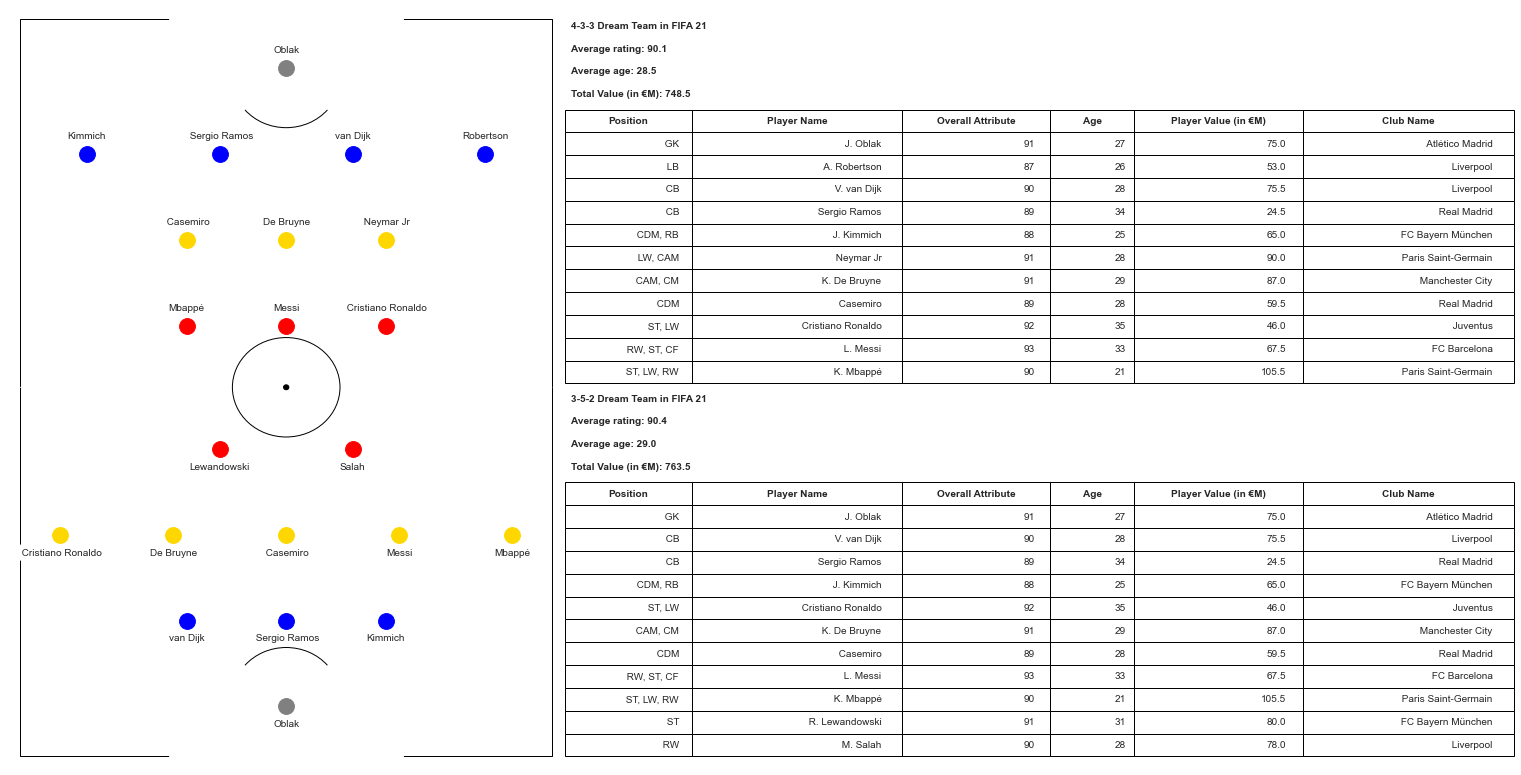

In [52]:
best_players_21_433 = get_best_lineup(fifa_21, squad_433)
best_players_21_352 = get_best_lineup(fifa_21, squad_352)


fig = plt.figure()
fig.set_size_inches(10, 14)
ax = fig.add_subplot(1, 1, 1)
draw_pitch(ax)
draw_players(best_players_21_433, '4-3-3 Dream Team in FIFA 21', '4-3-3', \
             best_players_21_352, '3-5-2 Dream Team in FIFA 21', '3-5-2')
plt.xlim(-2, 82)
plt.ylim(-2, 122)
plt.axis('off')
plt.show()


Formidable teams indeed, I don't think any team would like to go up against this team, either in real life or in FIFA. However, Santa Clara wouldn't have a chance to purchase this team with their small loan of 100M euros. Let's get a bit more realistic.

# **4. Task Discussion** <a class="anchor" id="4"></a>

Our aim is to buy a starting XI for Santa Clara for 100M euros. There are many ways to go about doing this. The naive way is to **divide the budget equally into 11 parts** (9.09M for each player), and look for players in each position with the best overall stats with value lower than 9.09M euros.

## 4.1. Naive Search

In [53]:
def naive_get_best_lineup_within_budget(df_name, squad_lineup, measurement="overall", budget=100, divided_by=11):
    df_copy = df_name.copy()
    squad_default_dict = dict()
    
    # Naive solution: divide the budget equally among 11 players, and search only among the list of players
    # whose value are lower or equal to the divided budget per players
    df_copy = df_copy.loc[df_copy["value_eur"] <= budget * 10**6 / divided_by]
    # divided by 10 or 9 instead, to maximize the total budget
    # df_copy = df_copy.loc[df_copy["value_eur"] <= budget * 10**6 / 8.5]

    for i in squad_lineup:
        squad_default_dict[
            df_copy.loc[
                [
                    df_copy[df_copy["player_positions"].str.contains(i)][
                        measurement
                    ].idxmax()
                ]
            ]["short_name"].to_string(index=False)
        ] = [
            df_copy.loc[
                [
                    df_copy[df_copy["player_positions"].str.contains(i)][
                        measurement
                    ].idxmax()
                ]
            ]["player_positions"].to_string(index=False),
            df_copy[df_copy["player_positions"].str.contains(i)][measurement].max(),
            int(
                df_copy.loc[
                    [
                        df_copy[df_copy["player_positions"].str.contains(i)][
                            measurement
                        ].idxmax()
                    ]
                ]["age"].to_string(index=False)
            ),
            float(
                df_copy.loc[
                    [
                        df_copy[df_copy["player_positions"].str.contains(i)][
                            measurement
                        ].idxmax()
                    ]
                ]["value_million_eur"].to_string(index=False)
            ),
            df_copy.loc[
                [
                    df_copy[df_copy["player_positions"].str.contains(i)][
                        measurement
                    ].idxmax()
                ]
            ]["club_name"].to_string(index=False),
        ]
        
        ## drop the players from the pool in order to avoid duplication
        df_copy.drop(
            df_copy[df_copy["player_positions"].str.contains(i)][measurement].idxmax(),
            inplace=True,
        )
    return squad_default_dict


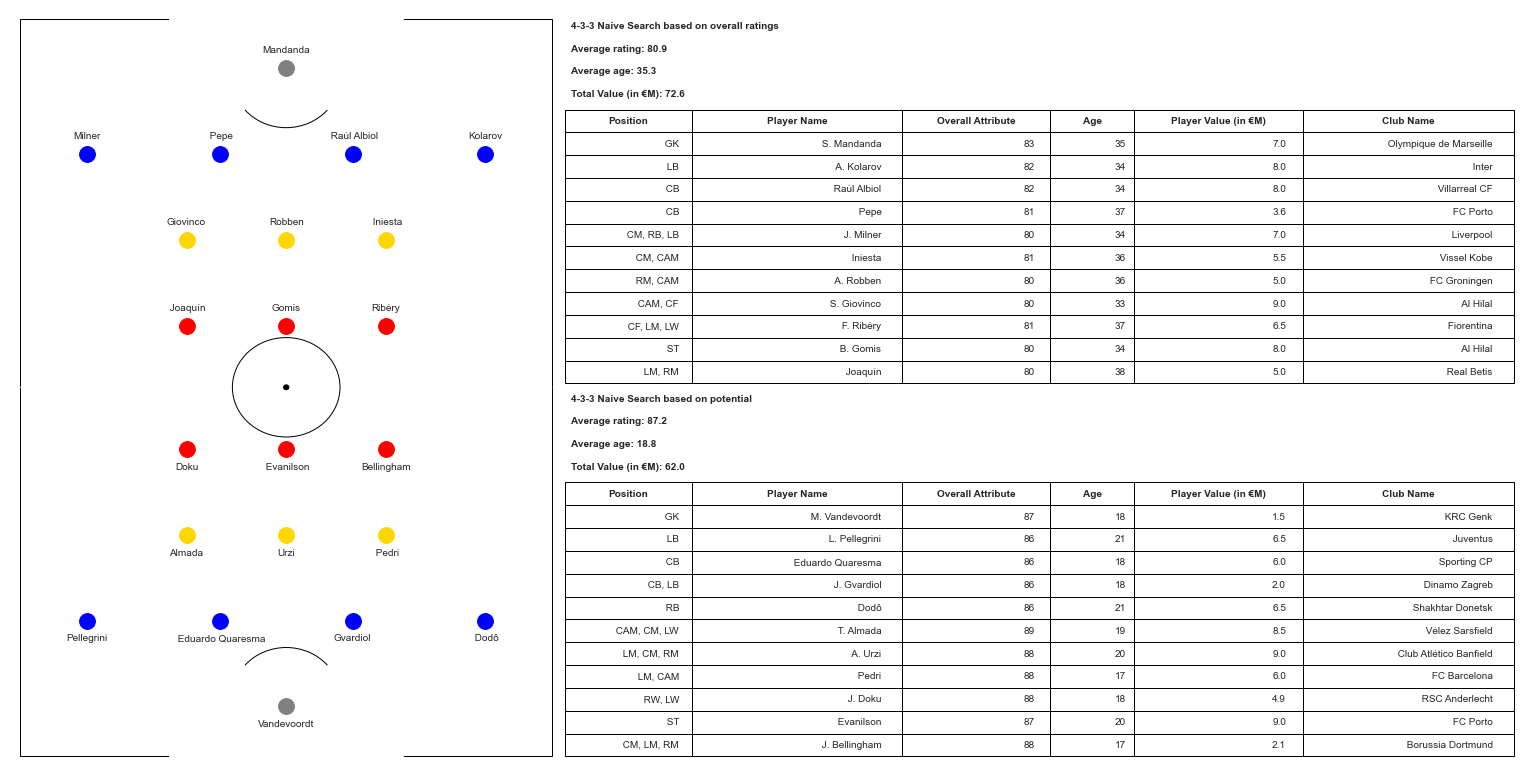

In [54]:
naive_433 = naive_get_best_lineup_within_budget(fifa_21, squad_433, budget = 100)
naive_433_potential = naive_get_best_lineup_within_budget(fifa_21, squad_433, measurement = "potential", budget = 100)
fig = plt.figure()
fig.set_size_inches(10, 14)
ax = fig.add_subplot(1, 1, 1)
draw_pitch(ax)
draw_players(naive_433, '4-3-3 Naive Search based on overall ratings', '4-3-3', \
             naive_433_potential, '4-3-3 Naive Search based on potential', '4-3-3')
plt.xlim(-2, 82)
plt.ylim(-2, 122)
plt.axis('off')
plt.show()

- Overall based search: When setting the measurement as default, which is the "overall" attribute of players, we got a decent team in our hand, with the likes of ex-Bayern Munich winger pair Arjen Robben and Franc Ribery, the evergreen machine James Milner, who is still rocking it at the highest level of football at the age of 34, and Iniesta dictating the plays from the midfield. All players' overall stats are over 80, and average rating coming in over 80.9. This team surely will be a force to be reckoned with ... 10 years ago. And here we come to the realization with this team: the average age is waaay too high, at 35.3 years old, with the oldest player at 38 years old. Most of the players in this list, even though having high overall ratings, will be retiring in a couple of years. Therefore, it would not be smart to purchase this XI for 70M euros.
- Potential based search: With the age problem in mind, we change the measurement based on the potential of the players. Thus, we focus on finding talents who down the line will be world beaters. We arrive at the team above, with the overall potential at 87.2, average age at 18.8. In several years, this team will take Santa Clare to the top of Liga NOS for sure, surpassing the likes of Porto, Benfica and Sporting.

**Downside**: Even though we got a strong team in our hand, we realize one weakness of the naive search algorithm: it leaves a huge gap in the total value of our players and the budget of 100M euros that we set in the beginning. There are certainly room for improvement.This was due to the limitation of only searching for players under the 100/11 = 9.09M euros evaluation. Let's see if we can do better.

## 4.2 Naive search improvement

With the gap limitation in mind, we try to see whether we can fit the budget better by adjusting the limitation for individual player's evalution. In the first place, we search for players under 100/11 = 9.09M euros. However, this leaves a gap in our total evaluation and our budget. The Santa Clara board is not happy about this! We can definitely spend more! So I adjusted the individual evaluation search, instead of search for players under 9.09M euros only, I tried to tune the hyper-parameters a bit by searching for players under:
1. 100/10 = 10M
2. 100/9 = 9M
3. 100/8.5 = 11.76M
4. 100/8 = 12M

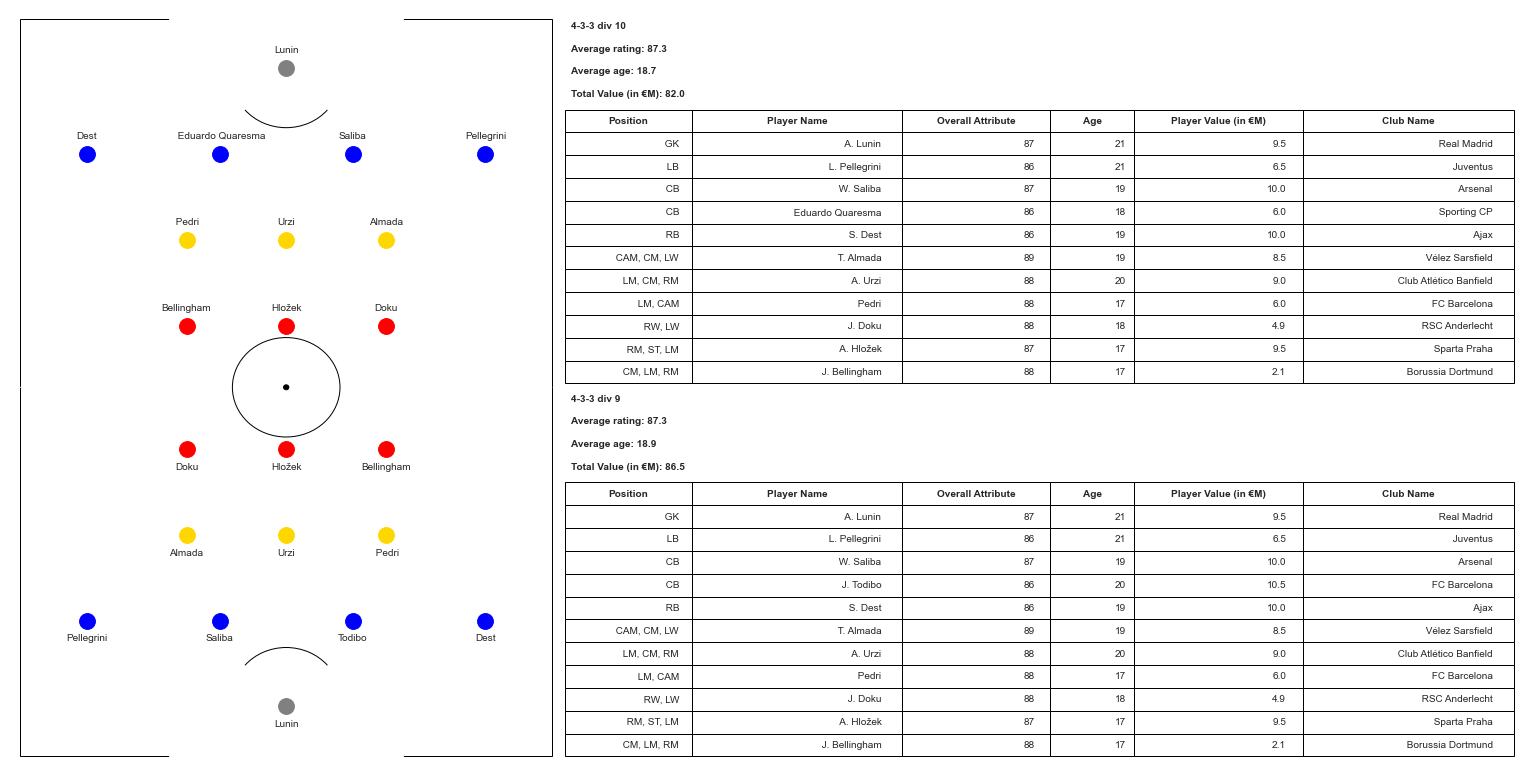

In [55]:
naive_433_potential_div_10 = naive_get_best_lineup_within_budget(fifa_21, squad_433, measurement = "potential",\
                                                                 budget = 100, divided_by=10)
naive_433_potential_div_9 = naive_get_best_lineup_within_budget(fifa_21, squad_433, measurement = "potential",\
                                                                 budget = 100, divided_by=9)
fig = plt.figure()
fig.set_size_inches(10, 14)
ax = fig.add_subplot(1, 1, 1)
draw_pitch(ax)
draw_players(naive_433_potential_div_10, '4-3-3 div 10 ', '4-3-3', \
             naive_433_potential_div_9, '4-3-3 div 9', '4-3-3')
plt.xlim(-2, 82)
plt.ylim(-2, 122)
plt.axis('off')
plt.show()

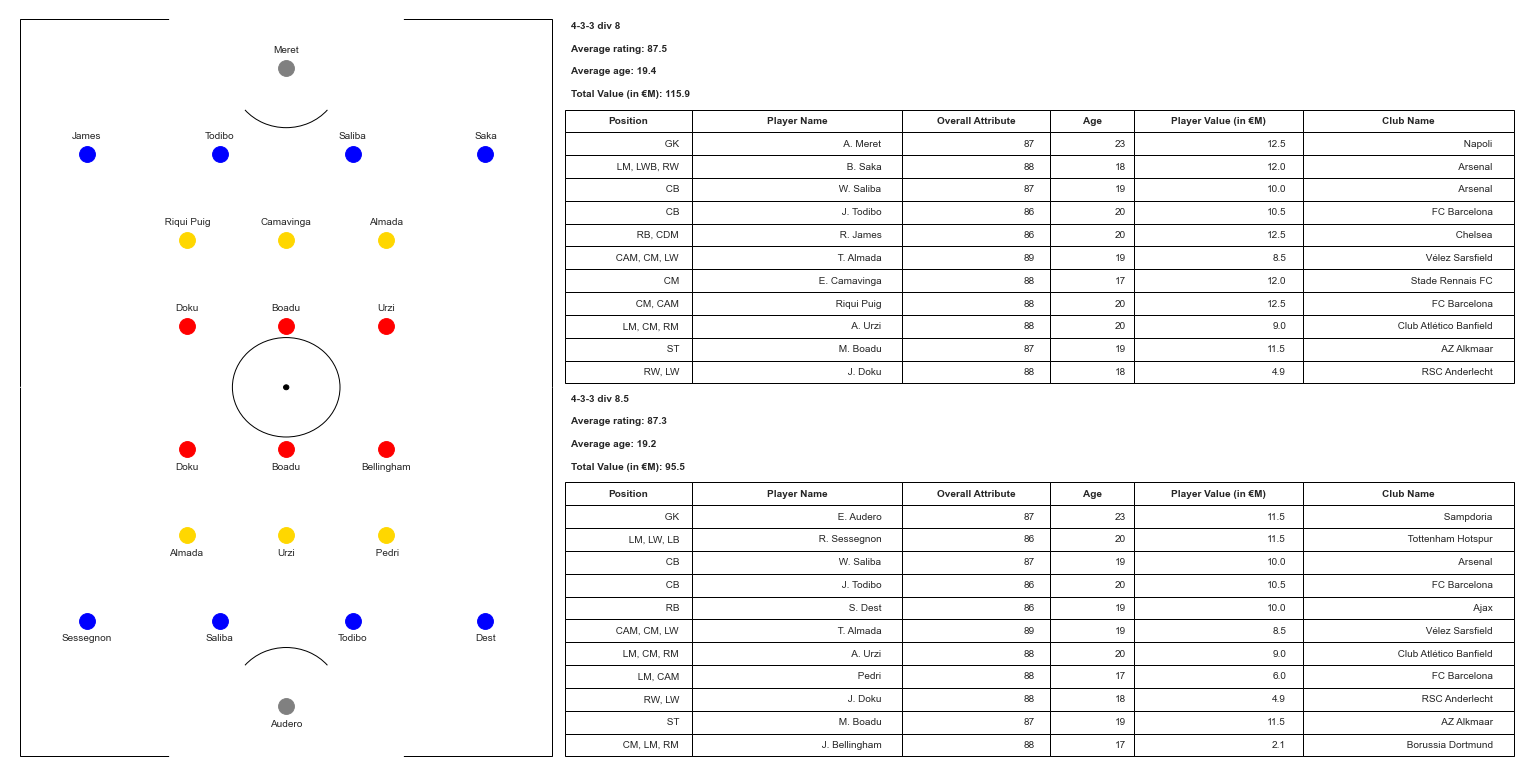

In [56]:
naive_433_potential_div_8 = naive_get_best_lineup_within_budget(fifa_21, squad_433, measurement = "potential",\
                                                                 budget = 100, divided_by=8)
naive_433_potential_div_8_5 = naive_get_best_lineup_within_budget(fifa_21, squad_433, measurement = "potential",\
                                                                 budget = 100, divided_by=8.5)
fig = plt.figure()
fig.set_size_inches(10, 14)
ax = fig.add_subplot(1, 1, 1)
draw_pitch(ax)
draw_players(naive_433_potential_div_8, '4-3-3 div 8 ', '4-3-3', \
             naive_433_potential_div_8_5, '4-3-3 div 8.5', '4-3-3')
plt.xlim(-2, 82)
plt.ylim(-2, 122)
plt.axis('off')
plt.show()

At the end, I'm quite happy with the solution that the naively solution provided, searching for players under. 100/8.5 = 11.76M. We obtain an amazing XI, with the total evaluation which is 95.5M euroes, just slightly under the 100M budget. And the team looks quite strong, with wonderkids such as Todibo, Sergino Dest and Pedri, who are rocking it in Barcelona (I don't think Barca is too happy about us robbing them of their young players), English hope Jude Bellingham who just arrived at Borrusia Dortmund.

### Testing the algorithm for different budgets

I want to see with a different budget, does the 8.5 division still hold for different budgets (75M, 150M), or does it only hold for 100M budget?

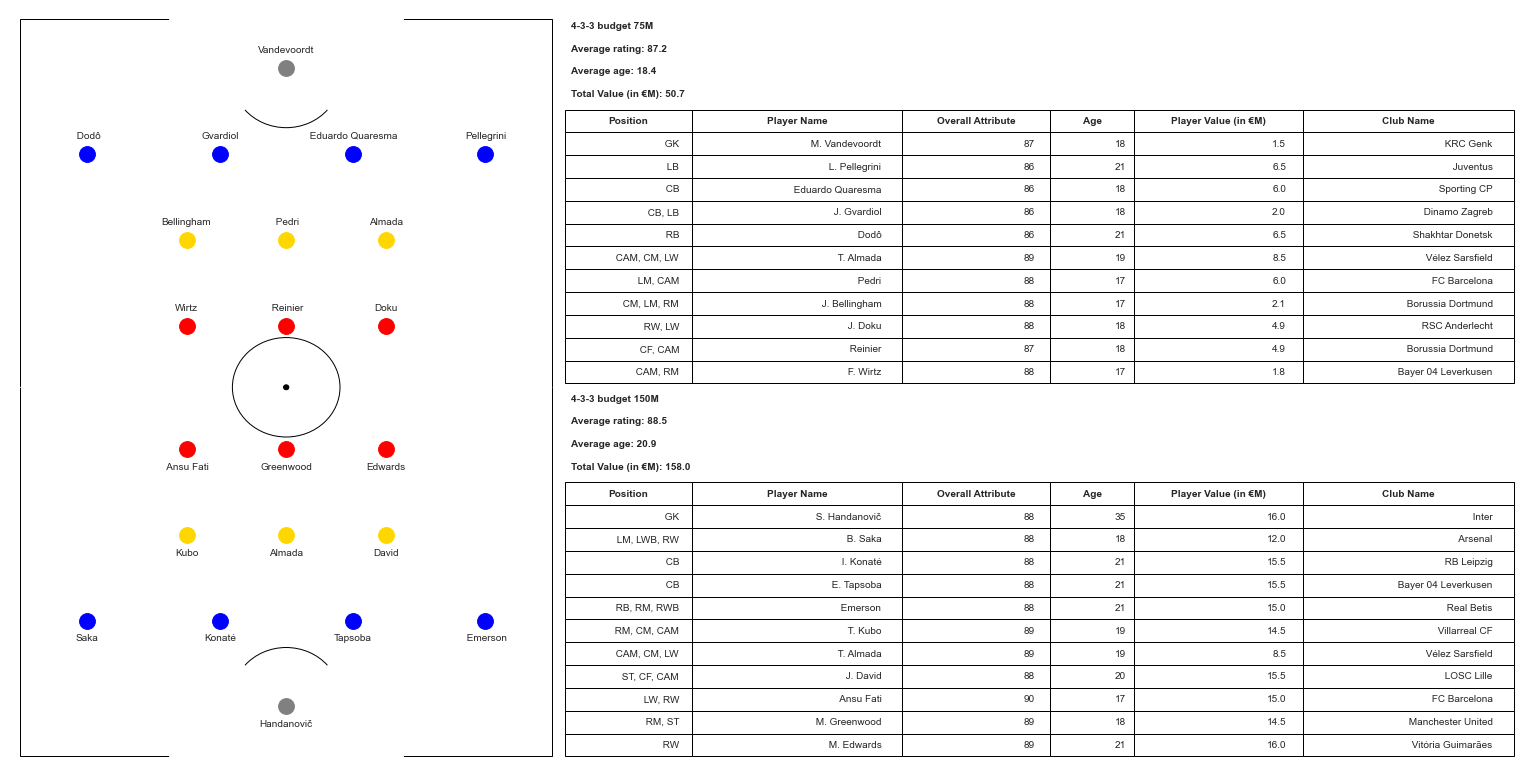

In [57]:
naive_433_potential_75 = naive_get_best_lineup_within_budget(fifa_21, squad_433, measurement = "potential",\
                                                                 budget = 75, divided_by=8.5)
naive_433_potential_150 = naive_get_best_lineup_within_budget(fifa_21, squad_433, measurement = "potential",\
                                                                 budget = 150, divided_by=8.5)
fig = plt.figure()
fig.set_size_inches(10, 14)
ax = fig.add_subplot(1, 1, 1)
draw_pitch(ax)
draw_players(naive_433_potential_75, '4-3-3 budget 75M', '4-3-3', \
             naive_433_potential_150, '4-3-3 budget 150M', '4-3-3')
plt.xlim(-2, 82)
plt.ylim(-2, 122)
plt.axis('off')
plt.show()

For different budgets, such as 75M and 150M, the 8.5 division does not hold up quite as well. For 75M budget, we get a team of 50M and for 150M budget, the team was slightly over the budget, 158M.

## 4.2 Further suggestion

There is two main problem with the naive approach:
1. The euro value limitation for each players is hardcoded in the beginning, therefore the naive algorithm was not able to optimally use the budget, or sometimes go over the set budget.
2. There is only one objective constraint for the algorithm. We can't choose the list of players that have the balance between current overall ratings and potential to grow in the future.

A solution for this is the [Knapsack Problem](https://en.wikipedia.org/wiki/Knapsack_problem). The knapsack problem is a problem in combinatorial optimization: Given a set of items, each with a weight and a value, determine the number of each item to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible. It derives its name from the problem faced by someone who is constrained by a fixed-size knapsack and must fill it with the most valuable items. The problem often arises in resource allocation where the decision makers have to choose from a set of non-divisible projects or tasks under a fixed budget or time constraint, respectively. In this session, I will discuss the feasibility of using Knapsack algorithm on this optimization problem.


![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Knapsack.svg/250px-Knapsack.svg.png)

Our task at hand is similar to the Knapsack problem, given a list of players, each with a set of attributes, including value in euros, overall stats, potential, etc, determine the 11 players so that the total value is less than or equal to 100M euros, and the total overall (or potential) is as large as possible. In our case, we only set one objective, which is either to maximize the overall ratings, or to maximize the potential of our XI. 

There are several possible solutions for this problem, based on the dynamic programming approach, the branch and bound approach or hybridizations of both approaches. Google's OR tools [link](https://developers.google.com/optimization/bin/knapsack) provides a quick solution the Knapsack problem. However, we need to keep several constraints in mind:
1. We need exactly 11 players, while the solution provided by the algorithm contains fewer players.
2. We need players spread out in all positions on the field, while the algorithm running naively would only focus on maximizing the ratings of players, rather than finding players for each position.

In [58]:
# only search for players under 50 million euros and over 1 million euros to reduce the load for the algorithm
# search for players under the age of 25, since we don't want to spend big bucks on old players
players_pool = fifa_21.loc[(fifa_21.value_million_eur < 50) & \
                           (fifa_21.value_million_eur > 1) & \
                           (fifa_21.potential >= 80) & \
                           (fifa_21.age <= 25)]
players_pool.shape
# we managed to bring down our player pool from 18000 players to 1100 players to reduce the load of our algorithms

(1132, 128)

### !pip install ortools
from ortools.algorithms import pywrapknapsack_solver

solver = pywrapknapsack_solver.KnapsackSolver(
    pywrapknapsack_solver.KnapsackSolver.
    KNAPSACK_MULTIDIMENSION_BRANCH_AND_BOUND_SOLVER, 'KnapsackExample')

values = list(players_pool.overall)
weights = [list(players_pool.value_million_eur),
          [1]*players_pool.shape[0]]
capacities = [100, 11]

solver.Init(values, weights, capacities)
solver.set_time_limit(3600) # Run-time: half an hour
computed_value = solver.Solve()

packed_items = []
packed_weights = []
total_weight = 0
print('Total value =', computed_value)
for i in range(len(values)):
    if solver.BestSolutionContains(i):
        packed_items.append(i)
        packed_weights.append(weights[0][i])
        total_weight += weights[0][i]
print('Total weight:', total_weight)
print('Packed items:', packed_items)
print('Packed_weights:', packed_weights)

# **5. Final team** <a class="anchor" id="5"></a>

In [59]:
naive_433_potential_div_8_5

{' E. Audero': [' GK', 87, 23, 11.5, ' Sampdoria'],
 ' R. Sessegnon': [' LM, LW, LB', 86, 20, 11.5, ' Tottenham Hotspur'],
 ' W. Saliba': [' CB', 87, 19, 10.0, ' Arsenal'],
 ' J. Todibo': [' CB', 86, 20, 10.5, ' FC Barcelona'],
 ' S. Dest': [' RB', 86, 19, 10.0, ' Ajax'],
 ' T. Almada': [' CAM, CM, LW', 89, 19, 8.5, ' Vélez Sarsfield'],
 ' A. Urzi': [' LM, CM, RM', 88, 20, 9.0, ' Club Atlético Banfield'],
 ' Pedri': [' LM, CAM', 88, 17, 6.0, ' FC Barcelona'],
 ' J. Doku': [' RW, LW', 88, 18, 4.9, ' RSC Anderlecht'],
 ' M. Boadu': [' ST', 87, 19, 11.5, ' AZ Alkmaar'],
 ' J. Bellingham': [' CM, LM, RM', 88, 17, 2.1, ' Borussia Dortmund']}

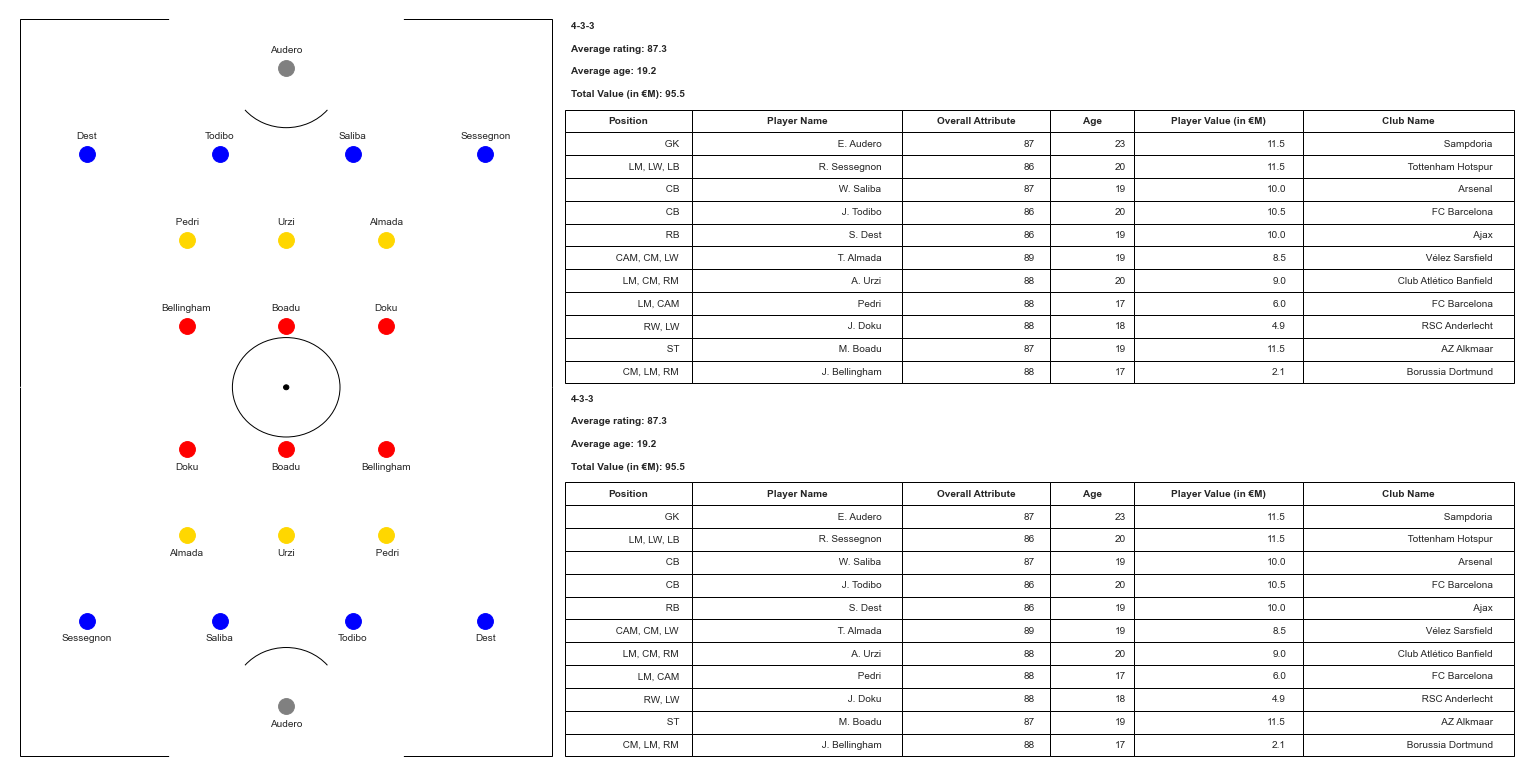

In [60]:
fig = plt.figure()
fig.set_size_inches(10, 14)
ax = fig.add_subplot(1, 1, 1)
draw_pitch(ax)
draw_players(naive_433_potential_div_8_5, '4-3-3 ', '4-3-3', \
             naive_433_potential_div_8_5, '4-3-3', '4-3-3')
plt.xlim(-2, 82)
plt.ylim(-2, 122)
plt.axis('off')
plt.show()